## ** 11 API Request
- author: Adrian Chirinos
- date: 08/29/25
- goals: Aprender a efectuar llamadas a APIs

In [31]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

True

In [22]:
#"https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&past_days=10&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"
url = "https://api.open-meteo.com/v1/forecast"
params = {
    'latitude':-12.06,
    'longitude':-77.0375,
    'past_days': 10,
    'hourly': "temperature_2m,relative_humidity_2m,wind_speed_10m"
    }
response = requests.get(url,params=params)

In [23]:
if(response.status_code == 200):
    data = response.json()
    print(f"Data retreive succesfully: {data.keys()}")
else:
    print(f"Error: {response.status_code}")

Data retreive succesfully: dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


In [24]:
data

{'latitude': -11.875,
 'longitude': -77.125,
 'generationtime_ms': 0.07784366607666016,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 143.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relative_humidity_2m': '%',
  'wind_speed_10m': 'km/h'},
 'hourly': {'time': ['2025-08-20T00:00',
   '2025-08-20T01:00',
   '2025-08-20T02:00',
   '2025-08-20T03:00',
   '2025-08-20T04:00',
   '2025-08-20T05:00',
   '2025-08-20T06:00',
   '2025-08-20T07:00',
   '2025-08-20T08:00',
   '2025-08-20T09:00',
   '2025-08-20T10:00',
   '2025-08-20T11:00',
   '2025-08-20T12:00',
   '2025-08-20T13:00',
   '2025-08-20T14:00',
   '2025-08-20T15:00',
   '2025-08-20T16:00',
   '2025-08-20T17:00',
   '2025-08-20T18:00',
   '2025-08-20T19:00',
   '2025-08-20T20:00',
   '2025-08-20T21:00',
   '2025-08-20T22:00',
   '2025-08-20T23:00',
   '2025-08-21T00:00',
   '2025-08-21T01:00',
   '2025-08-21T02:00',
   '2025-08-21T03:00',
   '2025-08-21T04:00',
   '

In [25]:
df_weather = pd.DataFrame(data["hourly"])
df_weather["time"] = pd.to_datetime(df_weather["time"])
df_weather = df_weather.set_index("time").sort_index()
df_weather

,temperature_2m,relative_humidity_2m,wind_speed_10m
time,,,
2025-08-20 00:00:00,17.1,87,16.3
2025-08-20 01:00:00,17.1,86,17.1
2025-08-20 02:00:00,17.0,85,16.4
2025-08-20 03:00:00,17.1,84,13.6
2025-08-20 04:00:00,17.1,85,9.5
...,...,...,...
2025-09-05 19:00:00,16.8,90,15.0
2025-09-05 20:00:00,16.8,90,16.3
2025-09-05 21:00:00,16.8,90,17.3


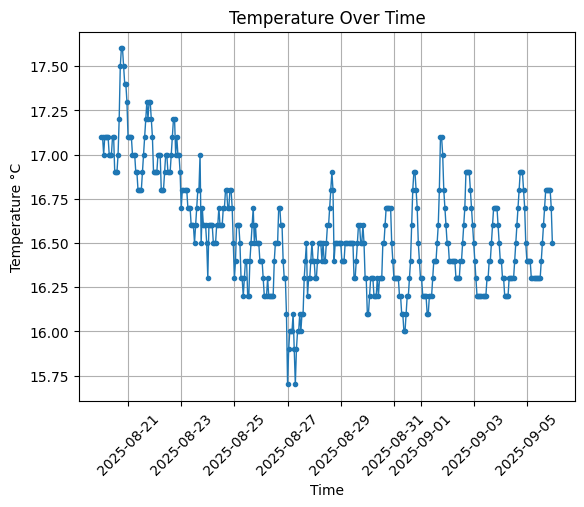

In [26]:
plt.plot(
    df_weather.index, df_weather["temperature_2m"], 
    marker="o", linestyle="-", linewidth=1, markersize=3
    )
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature °C")
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

In [27]:
#temperature_c, relative_humidity_pct, wind_speed_kmh
df_weather.columns = ["temperature_c", "relative_humidity_pct","wind_speed_kmh"]
df_weather

,temperature_c,relative_humidity_pct,wind_speed_kmh
time,,,
2025-08-20 00:00:00,17.1,87,16.3
2025-08-20 01:00:00,17.1,86,17.1
2025-08-20 02:00:00,17.0,85,16.4
2025-08-20 03:00:00,17.1,84,13.6
2025-08-20 04:00:00,17.1,85,9.5
...,...,...,...
2025-09-05 19:00:00,16.8,90,15.0
2025-09-05 20:00:00,16.8,90,16.3
2025-09-05 21:00:00,16.8,90,17.3


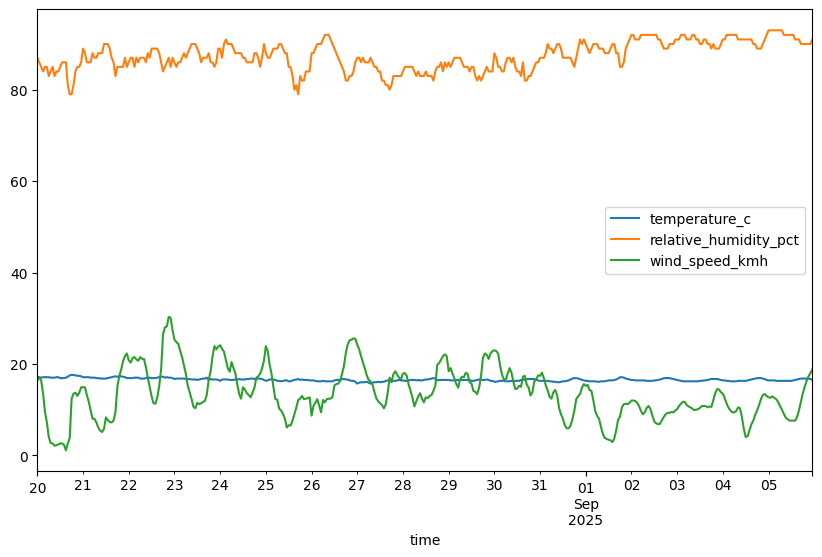

In [28]:
df_weather[["temperature_c", "relative_humidity_pct","wind_speed_kmh"]].plot(figsize=(10,6))
plt.show()

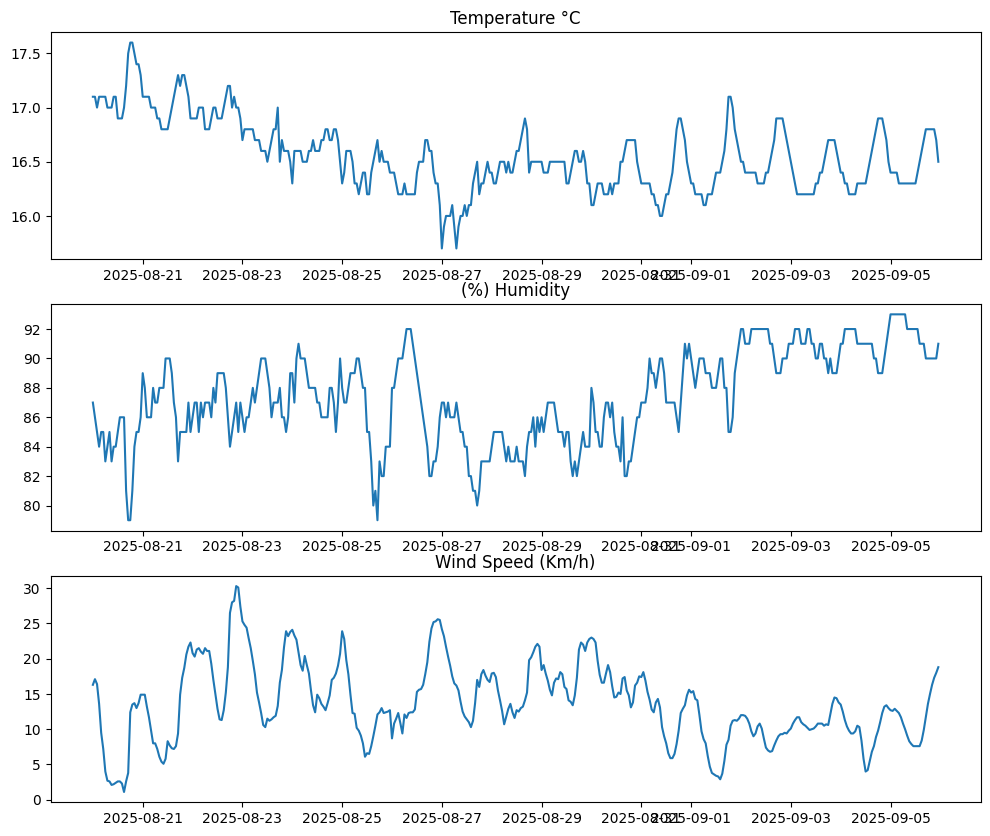

In [30]:
fig,(ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,10))


ax1.plot(df_weather.index, df_weather["temperature_c"])
ax1.set_title("Temperature °C")


ax2.plot(df_weather.index, df_weather["relative_humidity_pct"])
ax2.set_title("(%) Humidity")

ax3.plot(df_weather.index, df_weather["wind_speed_kmh"])
ax3.set_title("Wind Speed (Km/h)")

plt.show()


In [ ]:
spotify_client = os.getenv("SPOTIFY_CLIENT")
spotify_secret = os.getenv("SPOTIFY_SECRET")


In [33]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [34]:
sp = spotipy.Spotify(
    auth_manager= SpotifyClientCredentials(
        client_id=spotify_client, client_secret= spotify_secret
        )
        )

In [35]:
results = sp.search(q="weezer", limit=20)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=20&query=weezer&type=track',
  'limit': 20,
  'next': 'https://api.spotify.com/v1/search?offset=20&limit=20&query=weezer&type=track',
  'offset': 0,
  'previous': None,
  'total': 906,
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3jOstUTkEu2JkjvRdBA5Gu'},
       'href': 'https://api.spotify.com/v1/artists/3jOstUTkEu2JkjvRdBA5Gu',
       'id': '3jOstUTkEu2JkjvRdBA5Gu',
       'name': 'Weezer',
       'type': 'artist',
       'uri': 'spotify:artist:3jOstUTkEu2JkjvRdBA5Gu'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      'DE',
      'EC',
      'EE',
      'SV',
      'FI',
      'FR',
      'GR',
      'GT',
      'HN',
      'HK',
      'HU',
      'IS',
      'IE',
      'IT',
  

In [36]:
for idx, track in enumerate(results["tracks"]["items"]):
    print(f"{idx} {track["name"]}")

0 Buddy Holly
1 Island In The Sun
2 My Name Is Jonas
3 Say It Ain't So
4 Say It Ain't So - Original Mix
5 Pink Triangle
6 Undone - The Sweater Song
7 Africa
8 I Just Threw Out The Love Of My Dreams
9 Beverly Hills
10 Hash Pipe
11 Only In Dreams
12 You Gave Your Love To Me Softly
13 Think Fast (feat. Weezer)
14 Buddy Holly - 2024 Remaster
15 Pork And Beans
16 Pink Triangle
17 Lump
18 My Name Is Jonas - 2024 Remaster
19 Take on Me
